In [348]:
import pandas as pd

In [359]:

df = pd.read_csv("novel-corona-virus-2019-dataset/covid_19_data.csv")
df['ObservationDate'] = pd.to_datetime(df.ObservationDate, infer_datetime_format=True)  

df
# df.dtypes
# type(df)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10666,10667,2020-03-31,Wyoming,US,2020-03-31 23:49:27,109.0,0.0,0.0
10667,10668,2020-03-31,Xinjiang,Mainland China,2020-03-31 23:49:27,76.0,3.0,73.0
10668,10669,2020-03-31,Yukon,Canada,2020-03-31 23:49:27,5.0,0.0,0.0
10669,10670,2020-03-31,Yunnan,Mainland China,2020-03-31 23:49:27,182.0,2.0,172.0


In [350]:
# using dplyr in python
from dplython import (DplyFrame, X, diamonds, select, sift, sample_n,
    sample_frac, head, arrange, mutate, group_by, summarize, DelayFunction) 

df2 = DplyFrame(df)

df3 = (df2 >> 
  group_by(X.ObservationDate) >> 
  summarize(sum=X.Deaths.sum()))

df4 = (df2 >> 
  group_by(X['Country/Region']) >> 
  summarize(sum=X.Deaths.sum()))



In [351]:
from plotnine import *

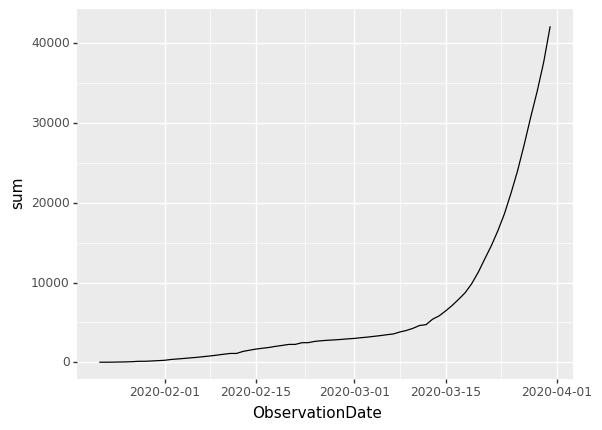

<ggplot: (-9223363259558648495)>

In [355]:
(ggplot(df3, aes(x='ObservationDate', y='sum')) + geom_line()
)


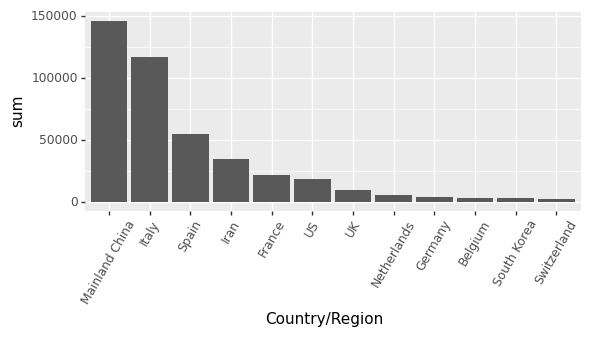

<ggplot: (-9223363259557408838)>

In [353]:
df5 = df4[(df4['sum'] > 1000)].sort_values('sum')

sorted_list = df5['Country/Region'][df5['sum'].sort_values(ascending=False).index.tolist()]

(ggplot(df5, aes(x='Country/Region', y='sum'))
 + geom_col()
 + scale_x_discrete(limits=sorted_list)
 + theme(aspect_ratio=.4, legend_position="bottom", axis_text_x=element_text(rotation=60, hjust=0.5))
)


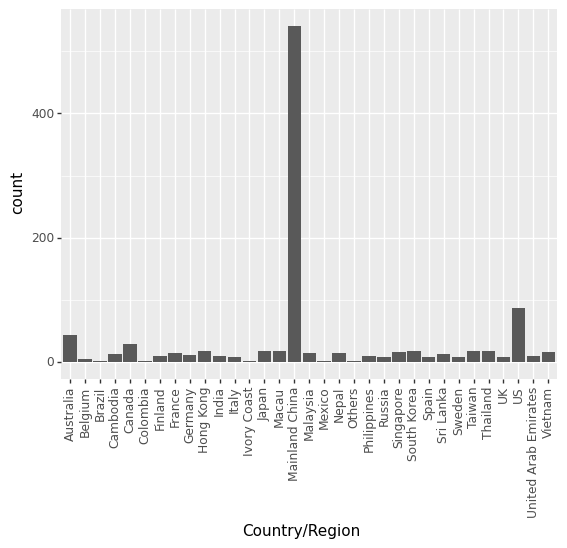

<ggplot: (8777302949675)>

In [354]:
(ggplot(df[1:1000])         # defining what data to use
 + aes(x='Country/Region')  # defining what variable to use
 + geom_bar(size=200)       # defining the type of plot to use 
 + theme(axis_text_x=element_text(rotation=90, hjust=0.5))
)